### Partial differential equations

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

Finite-dfferences solution to 

$$ \frac{\partial c(t,x)}{\partial t} = D \frac{\partial^2 c(t,x)}{\partial x^2}$$

with the boundary conditions:

$$ c(t,0) = lb, \;\; c(t,L) = rb $$

and initial condition:

$$ c(0,x) = c0(x) $$

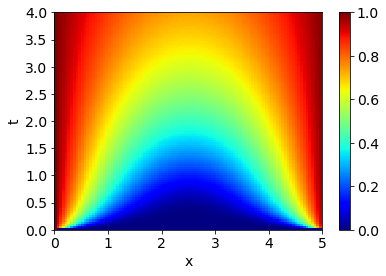

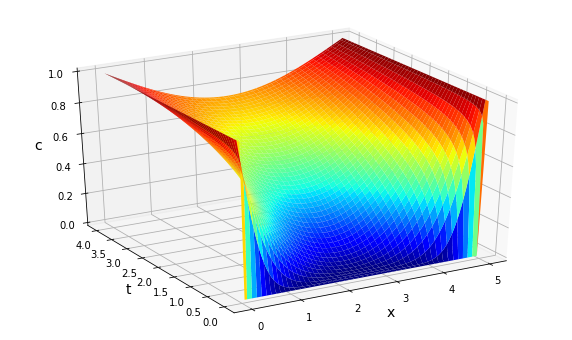

In [19]:
L = 5
N = 100
lb = 1
rb = 1

delta = L/(N-1)
D = 1
k = 2

def rhs(c,t):
    
    retval = np.zeros(N)
    
    # right boundary -- these are fixed so the derivative is zero
    retval[0] = 0
    
    # interior
    retval[1:-1] = D/delta/delta*(c[:-2] - 2*c[1:-1] + c[2:])
    
    # left boundary
    retval[-1] = 0
    
    return retval

# define domain
x = np.linspace(0,L,N)
# define initial condition
c0 = np.zeros(N)
# add boundary conditions
c0[0] = lb
c0[-1] = rb

# define time domain
t = np.linspace(0,4,100)
# solve the equation
c = odeint(rhs,c0,t)

plt.pcolormesh(x, t, c, cmap='jet',lw=0)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('x',fontsize=14)
plt.ylabel('t',fontsize=14)
plt.show()

X,T = np.meshgrid(x,t)
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, T, c, cmap='jet',lw=0)
ax.view_init(None, -120)
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('t',fontsize=14)
ax.set_zlabel('c',fontsize=14)
plt.show()

Finite-dfferences solution to 

$$ \frac{\partial c(t,x)}{\partial t} = D \frac{\partial^2 c(t,x)}{\partial x^2}$$

with the boundary conditions:

$$ \frac{\partial}{\partial x} c(t,-L/2) = 0, \;\; \frac{\partial}{\partial x} c(t,L/2) = 0 $$

and initial condition:

$$ c(0,x) = c0(x) $$

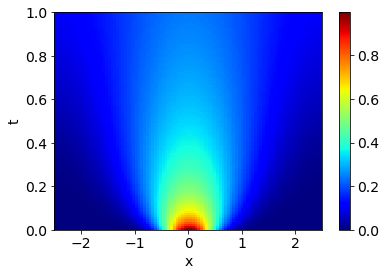

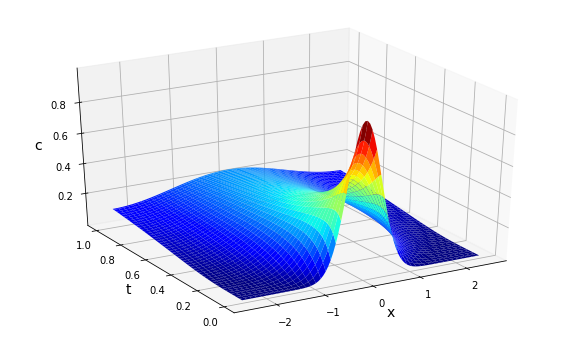

In [23]:
L = 5
N = 100

delta = L/(N-1)
D = 1
k = 2

def rhs(c,t):
    
    retval = np.zeros(N)    
    # right boundary 
    retval[0] = D/delta/delta*(c[1] - c[0])
    
    # interior
    retval[1:-1] = D/delta/delta*(c[:-2] - 2*c[1:-1] + c[2:])
    
    # left boundary
    retval[-1] = D/delta/delta*(c[-2] - c[-1])
    
    return retval

# define domain
x = np.linspace(-L/2,L/2,N)
# define initial condition
c0 = np.exp(-4*x**2)

# define time domain
t = np.linspace(0,1,100)
# solve the equation
c = odeint(rhs,c0,t)

plt.pcolormesh(x, t, c, cmap='jet',lw=0)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('x',fontsize=14)
plt.ylabel('t',fontsize=14)
plt.show()

X,T = np.meshgrid(x,t)
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, T, c, cmap='jet',lw=0)
ax.view_init(None, -120)
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('t',fontsize=14)
ax.set_zlabel('c',fontsize=14)
plt.show()

The Grey-Scott equation:

Finite-dfferences solution to 

$$ \frac{\partial u(t,x)}{\partial t} = D \frac{\partial^2 u(t,x)}{\partial u^2} + b(1-u(t,x)) - u(t,x) v(t,x)^2$$

$$ \frac{\partial v(t,x)}{\partial t} = D \frac{\partial^2 v(t,x)}{\partial v^2} + d v(t,x)) + u(t,x) v(t,x)^2$$

with the boundary conditions:

$$ \frac{\partial}{\partial x} u(t,-L/2) = 0, \;\; \frac{\partial}{\partial x} u(t,L/2) = 0 $$

$$ \frac{\partial}{\partial x} v(t,-L/2) = 0, \;\; \frac{\partial}{\partial x} v(t,L/2) = 0 $$

and initial condition:

$$ u(0,x) = u_0(x), \;\; v(0,x) = v_0(x) $$

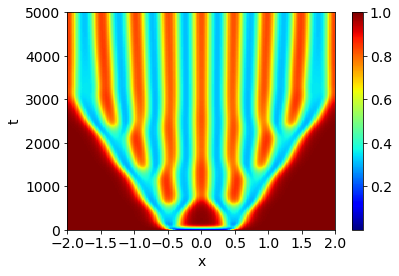

In [81]:
D1 = 0.0002
D2 = 0.0001
b = 0.04
d = 0.1

L = 4
N = 200
delta = L/(N-1)


def rhs(z,t):
    
    u,v = z[:N],z[N:]
    
    retval_1,retval_2 = np.zeros(N),np.zeros(N)   
    
    # right boundary 
    retval_1[0] = D1/delta/delta*(u[1] - u[0]) + b*(1-u[0]) - u[0]*v[0]**2
    
    # interior
    retval_1[1:-1] = D1/delta/delta*(u[:-2] - 2*u[1:-1] + u[2:]) + b*(1-u[1:-1]) - u[1:-1]*v[1:-1]**2
    
    # left boundary
    retval_1[-1] = D1/delta/delta*(u[-2] - u[-1]) + b*(1-u[-1]) - u[-1]*v[-1]**2
    
    
    # right boundary 
    retval_2[0] = D2/delta/delta*(v[1] - v[0]) - d*v[0] + u[0]*v[0]**2
    
    # interior
    retval_2[1:-1] = D2/delta/delta*(v[:-2] - 2*v[1:-1] + v[2:]) - d*v[1:-1] + u[1:-1]*v[1:-1]**2
    
    # left boundary
    retval_2[-1] = D2/delta/delta*(v[-2] - v[-1]) - d*v[-1] + u[-1]*v[-1]**2
    
    return np.concatenate((retval_1,retval_2))

x = np.linspace(-L/2,L/2,N)

# initial conditions
u0 = 1-np.exp(-10*(x)**2)
v0 = np.exp(-10*(x)**2)
z0 = np.concatenate((u0,v0))

# time span
t = np.linspace(0,5000,1000)

c = odeint(rhs,z0,t)
u = c[:,:N]
v = c[:,N:]

plt.pcolormesh(x, t, u, cmap='jet',lw=0)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('x',fontsize=14)
plt.ylabel('t',fontsize=14)
plt.show()